### Недообучение и переобучение  
#### Цель работы  
Познакомиться с основными проблемами обобщающей способности алгоритмов машинного обучения: overfitting (переобучение) и underfitting (недообучение).  

#### Задания для выполнения  
Загрузите первые 400 строк прилагающегося датасета diabetes.csv.  
Сделайте количественное описание датасета: число признаков, статистику по признакам.  
Отделите целевую переменную Outcome.  
Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.  
Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.  
Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.  
Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.  
Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.  
Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.  
Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0, 
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8413
Test score: 0.8056


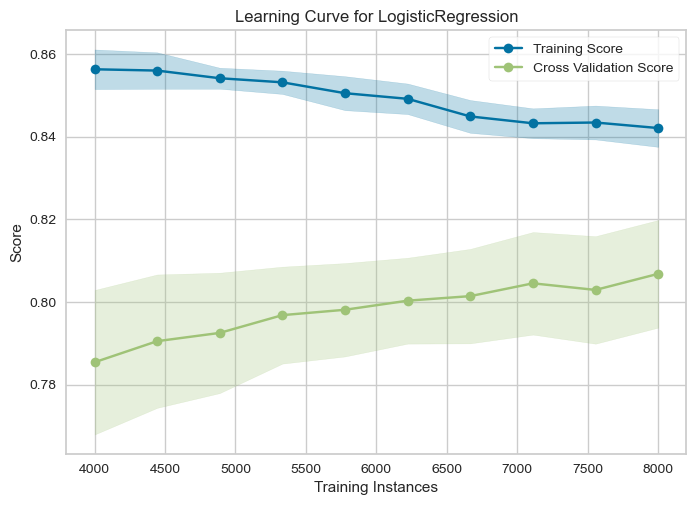

In [4]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

In [5]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


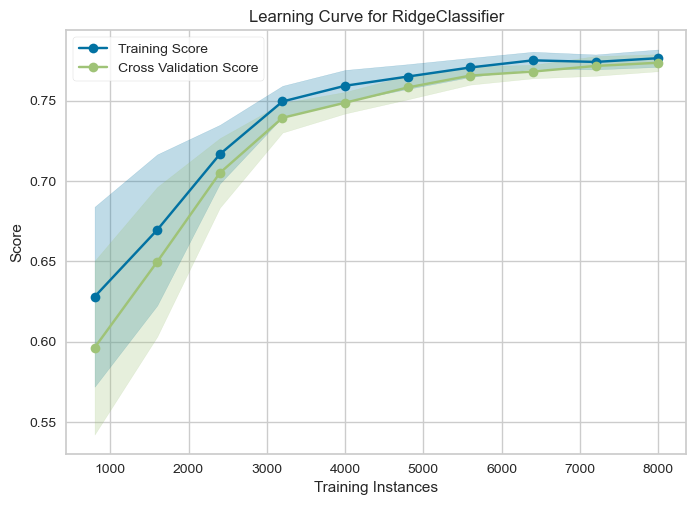

In [6]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

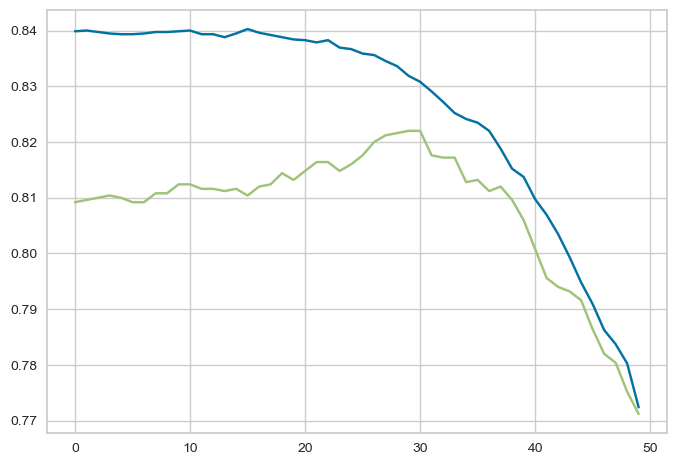

In [7]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [8]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


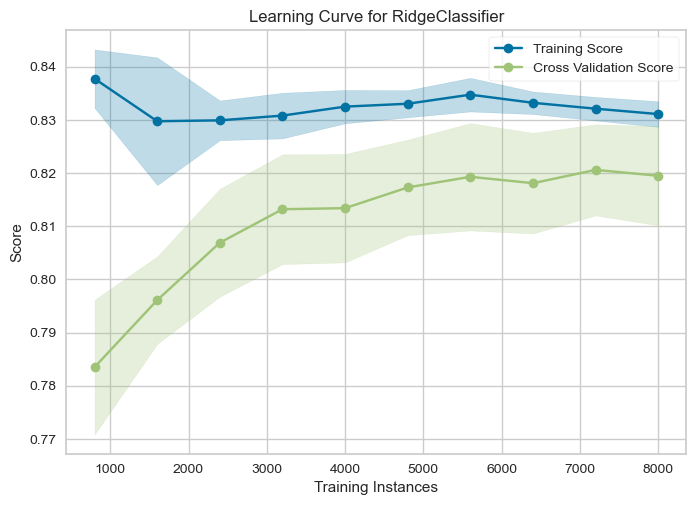

<Axes: title={'center': 'Learning Curve for RidgeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [9]:
model = RidgeClassifier(alpha=26500)

visualizer = LearningCurve(
    model, 
    train_sizes=np.linspace(0.1, 1.0, 10),  
    scoring='accuracy',                      
    cv=5,                                  
    n_jobs=-1                             
)

visualizer.fit(X, y)  
visualizer.show()

In [26]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred)) 

Train score = 1.0000
Test score = 0.5500


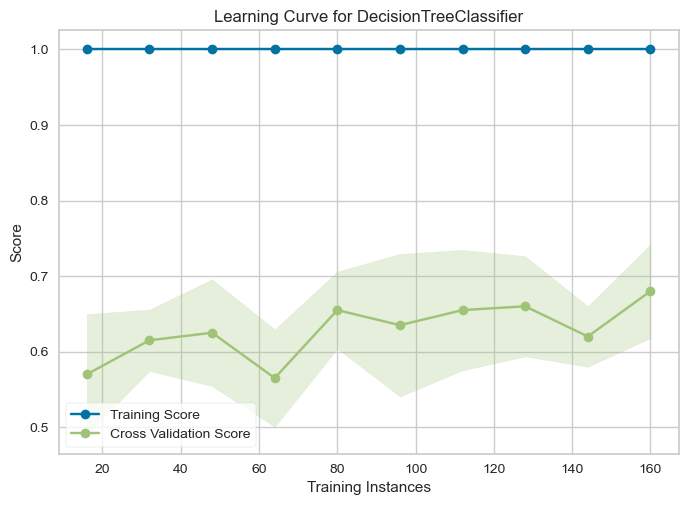

<Axes: title={'center': 'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1),  
    train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring='accuracy',  
    cv=5, 
    n_jobs=-1 
)
visualizer.fit(X, y)  
visualizer.show()

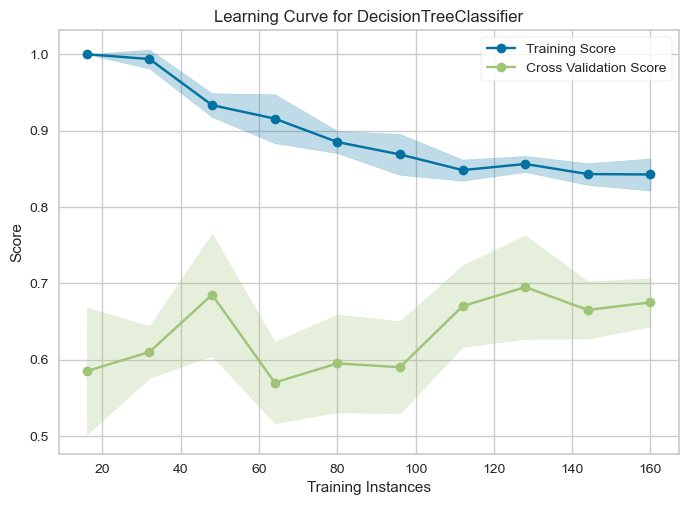

In [30]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

In [31]:
from sklearn.metrics import f1_score
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train F1-score = %.4f" % f1_score(y_train, y_train_pred))
print("Test F1-score  = %.4f" % f1_score(y_test, y_test_pred))

Train F1-score = 0.7600
Test F1-score  = 0.5882


In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


In [35]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

In [36]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6092
Test score = 0.5989


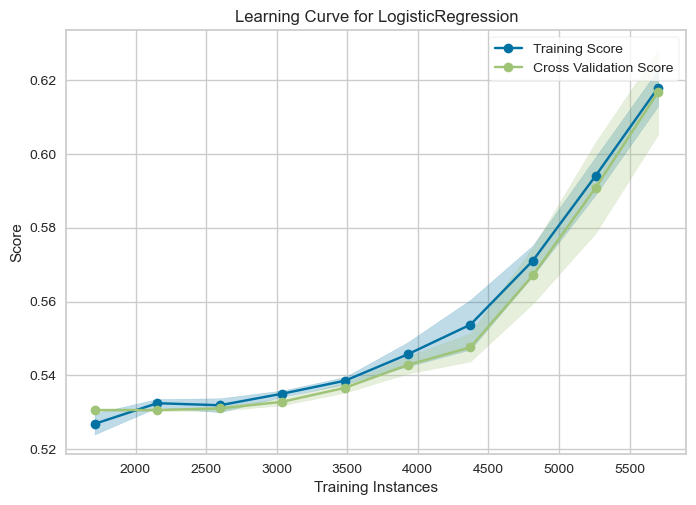

In [38]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show() 

In [39]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9379
Test score = 0.9369


c:\Users\Sofia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\Sofia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofia\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

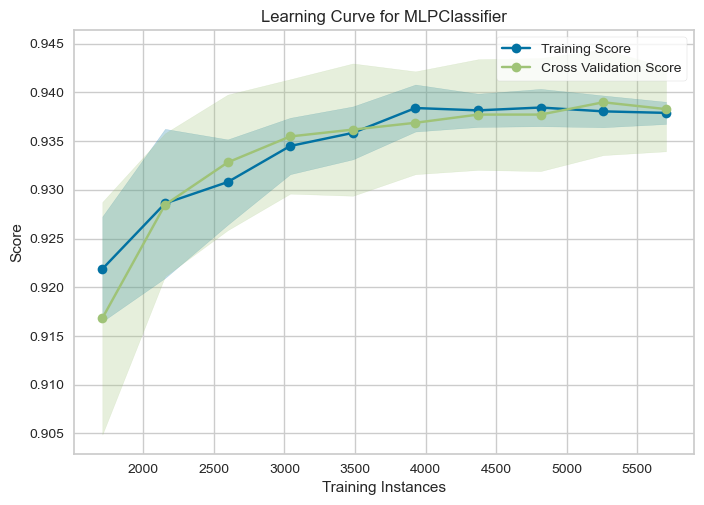

In [40]:
visualizer = LearningCurve(
    MLPClassifier(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show() 

In [41]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


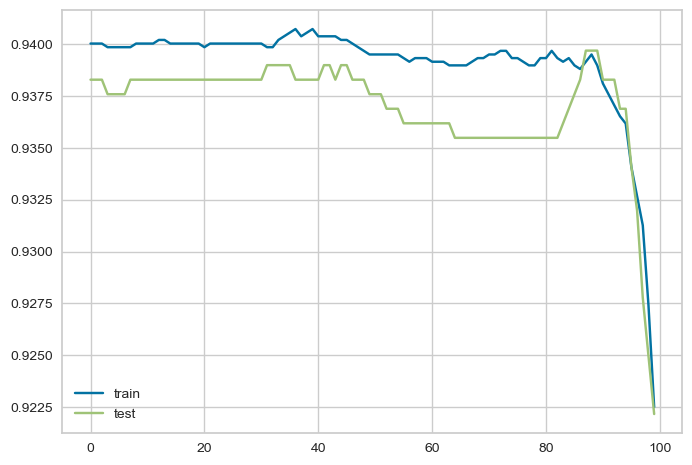

: 

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()